### Week2授業課題1 二次元配列と勾配問題

In [222]:
'''
モジュールのインポート
'''
import numpy as np
import matplotlib.pyplot as plt

#### 【問題1】1次関数

In [113]:
'''
ndarray にて、関数の実装
'''
def one_dime_fun(x):
    return 0.5*x + 1

x = np.arange(-50, 50.1, 0.1)
y = one_dime_fun(x)

#### 【問題2】配列の結合

In [118]:
'''
問題１の配列の結合
'''
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

xy = np.concatenate([x, y], 1)
print(xy.shape)
print(xy[0])

(1001, 2)
[-50. -24.]


#### 【問題3】勾配を求める

In [212]:
'''
各x座標における勾配を求める
'''
xy_gradient = (y[1:] - y[:-1]) / (x[1:] - x[:-1])

In [213]:
print(xy_gradient)

[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


#### 【問題4】グラフを描く

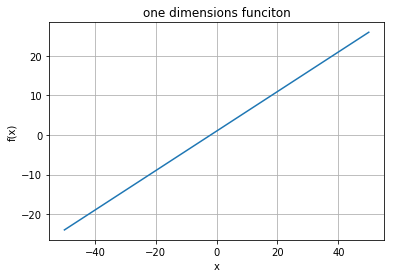

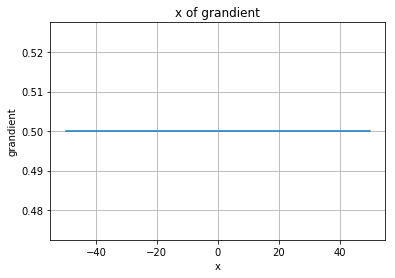

In [214]:
'''
横軸を x、縦軸を勾配にしたグラフ
'''
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("one dimensions funciton")
plt.grid()
plt.show()

plt.plot(x[1:], xy_grand)
plt.xlabel("x")
plt.ylabel("grandient")
plt.title("x of grandient")
plt.grid()
plt.show()

##### 【問題5】Pythonの関数化

In [304]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    x = np.arange(*x_range).reshape(-1, 1)
    y = function(x)
    
    array_conc = np.concatenate([x, y], 1)
    xy_gradient = (y[1:] - y[:-1]) / (x[1:] - x[:-1])

    return array_conc, xy_gradient

def function1(x):
    return x**2

def function2(x):
    return 2*x**2 + 2*x

def function3(x):
    return np.sin(np.sqrt(x))

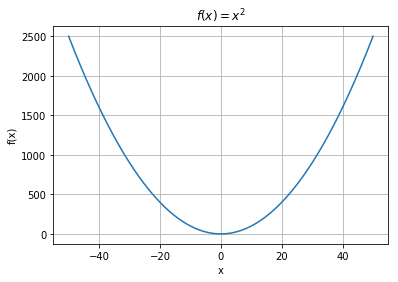

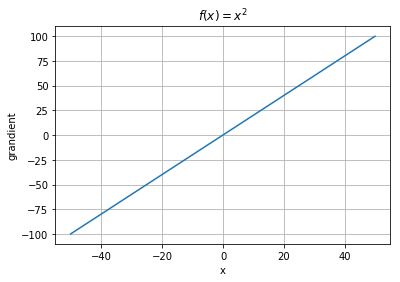

In [378]:
array_conc1, xy_gradient1 = compute_gradient(function1)
plt.plot(array_conc1[:,0], array_conc1[:,1])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("$f(x)=x^2$")
plt.grid()
plt.show()

plt.plot(array_conc1[:-1, :-1], xy_gradient1)
plt.xlabel("x")
plt.ylabel("grandient")
plt.title("$f(x)=x^2$")
plt.grid()
plt.show()

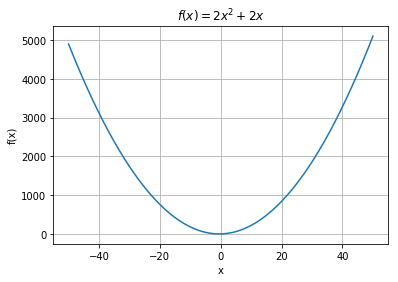

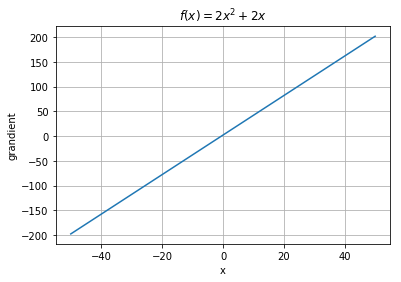

In [353]:
array_conc2, xy_gradient2= compute_gradient(function2)
plt.plot(array_conc2[:,0], array_conc2[:,1])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("$f(x)=2x^2 + 2x$")
plt.grid()
plt.show()

plt.plot(array_conc2[:-1, :-1], xy_gradient2)
plt.xlabel("x")
plt.ylabel("grandient")
plt.title("$f(x)=2x^2 + 2x$")
plt.grid()
plt.show()

/Users/oowakiterumasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


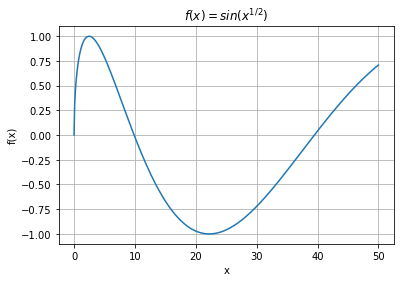

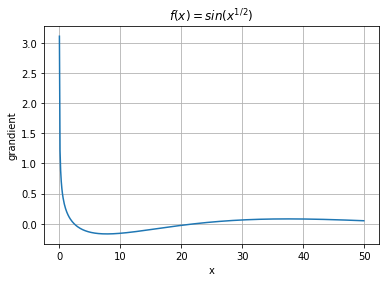

In [354]:
array_conc3, xy_gradient3 = compute_gradient(function3)
plt.plot(array_conc3[:,0], array_conc3[:,1])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("$f(x)=sin(x^{1/2})$")
plt.grid()
plt.show()

plt.plot(array_conc3[:-1, :-1], xy_gradient3)
plt.xlabel("x")
plt.ylabel("grandient")
plt.title("$f(x)=sin(x^{1/2})$")
plt.grid()
plt.show()

【気づき】  
・確認作業として、y = x**2 関数における x = 0 のときの勾配を確認しようとしたが、x に0が入っていなかった。  
x = np.arange(-50, 50.1, 0.1)  
print(x[0]) # -50.0  
print(x[1]) # -49.9  
print(x[2]) # -49.8  
print(x[3]) # -49.699999999999996  
print(x[500]) # 7.105427357601002e-13  
(推測)  
コンピュータ内部で10進数の0.1を表現することはできない  
0.00011001100110…という循環小数になる  

#### 【問題6】最小値を求める

In [470]:
def min_func1(array_conc, xy_gradient):
    min_n = np.min(array_conc[:, 1])
    min_idx = np.argmin(array_conc[:, 1])
    return "最小値：{}\n最小値の一つ前の勾配：{}\n最小値の一つ後の勾配：{}" \
            .format(min_n, xy_gradient[min_idx-1], xy_gradient[min_idx+1])

def min_func2(array_conc, xy_gradient):
    min_n = np.min(array_conc[500:, 1])
    min_idx = np.argmin(array_conc[500:, 1])
    print(min_idx)
    # -50〜-0.1 の部分はいらないため、+500 を追加
    return "最小値：{}\n最小値の一つ前の勾配：{}\n最小値の一つ後の勾配：{}" \
            .format(min_n, xy_gradient[min_idx-1+500], xy_gradient[min_idx+1+500]) 

In [471]:
print(min_func1(array_conc1, xy_gradient1))

最小値：5.048709793414476e-25
最小値の一つ前の勾配：[-0.1]
最小値の一つ後の勾配：[0.3]


In [472]:
print(min_func1(array_conc2, xy_gradient2))

最小値：-0.5
最小値の一つ前の勾配：[-0.2]
最小値の一つ後の勾配：[0.6]


In [473]:
print(min_func2(array_conc3, xy_gradient3))

222
最小値：-0.9999997540298114
最小値の一つ前の勾配：[-0.00063884]
最小値の一つ後の勾配：[0.00160612]
